In [9]:
import re
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
!pip install contractions
import contractions



---



Reading the three json files and creating dataframes(Waitrose, sainsburys and tesco)

In [10]:
# waitrose
waitrose_df = pd.read_json('waitrose.json')
waitrose_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-07-29 10:28:58,1288421250000000000,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Jul 28 16:29:56 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
1,2020-11-17 16:31:19,1328737494000000000,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.328654e+18,1.328654e+18,1.327758e+18,1.327758e+18,...,[{'tag': None}],"[57, 133]",None,NaN,NaN,NaN,None,None,None,NaN
2,2020-02-28 20:19:01,1233486785000000000,1233486785000000000,@waitrose the wine you delivered yesterday was...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
3,2020-11-13 09:21:04,1327179666000000256,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Nov 13 07:00:00 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
4,2020-06-04 20:54:01,1268647218000000000,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 04 16:31:25 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN


In [11]:
waitrose_df.dtypes

created_at                   datetime64[ns]
id                                    int64
id_str                                int64
text                                 object
source                               object
truncated                              bool
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
in_reply_to_screen_name              object
user                                 object
geo                                  object
coordinates                          object
place                                object
contributors                        float64
is_quote_status                        bool
extended_tweet                       object
quote_count                           int64
reply_count                           int64
retweet_count                         int64
favorite_count                        int64
entities                        

In [12]:
waitrose_df['created_at'] = waitrose_df['created_at'].dt.date
waitrose_df = waitrose_df.sort_values(by ='created_at')
waitrose_df

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
9105,2020-01-01,1212326799000000000,1212326799000000000,@waitrose Could you please have a look at your...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
24594,2020-01-01,1212479620000000000,1212479620000000000,This machine is changing the world of baking #...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,None,0.0,NaN,NaN,None,None,None,NaN
9587,2020-01-01,1212256214000000000,1212256214000000000,RT @UKinZimbabwe: Zimbabwean scientist @Takund...,"<a href=""http://www.godlikebct.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Dec 13 08:07:52 +0000 2019...,NaN,NaN,NaN,None,None,None,NaN
9756,2020-01-01,1212443524000000000,1212443524000000000,RT @PlantShift: If you're vegan and you've mis...,"<a href=""http://placeholder.com"" rel=""nofollow...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Wed Jan 01 18:40:16 +0000 2020...,0.0,1.212358e+18,1.212358e+18,{'created_at': 'Wed Jan 01 13:00:32 +0000 2020...,"{'url': 'https://t.co/qnf3h0n2Yu', 'expanded':...",None,NaN
16170,2020-01-01,1212354728000000000,1212354728000000000,@waitrose I have been a customer of yours for ...,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20616,2020-12-30,1344193111000000000,1344193111000000000,@waitrose can I link my account with my partne...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
24277,2020-12-30,1344428507000000000,1344428507000000000,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
11700,2020-12-30,1344332872000000000,1344332872000000000,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
17782,2020-12-30,1344229375000000000,1344229375000000000,@poorscousertom1 @Ocado @waitrose @sainsburys ...,"<a href=""http://twitter.com/download/android"" ...",False,1.343951e+18,1.343951e+18,7.960980e+17,7.960980e+17,...,[{'tag': None}],"[53, 64]",None,NaN,NaN,NaN,None,None,None,NaN


In [15]:
# sainsbury
sainsbury_df = pd.read_json('sainsburys.json')
sainsbury_df['created_at'] = sainsbury_df['created_at'].dt.date
sainsbury_df = sainsbury_df.sort_values(by ='created_at')
sainsbury_df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities,scopes
9738,2020-01-01,1212495897394896897,1212495897394896897,@sainsburys order placed on 14 Dec was delayed...,None,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,8.068565e+07,...,[{'tag': None}],None,NaN,NaN,None,None,{'full_text': '@sainsburys order placed on 14 ...,None,None,NaN
64647,2020-01-01,1212332236458082305,1212332236458082305,@SaffronWatson_ @sainsburys I couldn’t find an...,"[28, 50]","<a href=""http://twitter.com/download/iphone"" r...",False,1.212326e+18,1.212326e+18,7.471756e+17,...,[{'tag': None}],None,NaN,NaN,None,None,None,None,None,NaN
79476,2020-01-01,1212428488608800774,1212428488608800774,So pleased that @sainsburys have started stock...,"[0, 95]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],None,NaN,NaN,None,None,None,False,"{'media': [{'id': 1212428480555577344, 'id_str...",NaN
61178,2020-01-01,1212511251118657536,1212511251118657536,@sainsburys It was marsh mills in plymouth pro...,"[12, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.212283e+18,1.212283e+18,8.068565e+07,...,[{'tag': None}],None,NaN,NaN,None,None,{'full_text': '@sainsburys It was marsh mills ...,None,None,NaN
15750,2020-01-01,1212507819028692999,1212507819028692999,Loving the new label for the @sainsburys Taste...,"[0, 140]","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",True,NaN,NaN,NaN,...,[{'tag': None}],None,NaN,NaN,None,None,"{'full_text': ""Loving the new label for the @s...",False,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57535,2020-12-30,1344255421201178625,1344255421201178624,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,NaN,NaN,...,[{'tag': None}],{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN
80215,2020-12-30,1344220445705441281,1344220445705441280,@typenamehere12 @drphiliplee1 @sainsburys You ...,"[42, 119]","<a href=""http://twitter.com/download/android"" ...",False,1.344045e+18,1.344045e+18,2.175018e+07,...,[{'tag': None}],None,NaN,NaN,None,None,None,None,None,NaN
13749,2020-12-30,1344212171782295552,1344212171782295552,@poorscousertom1 @Ocado @waitrose @sainsburys ...,"[53, 140]","<a href=""http://twitter.com/#!/download/ipad"" ...",True,1.343951e+18,1.343951e+18,7.960980e+17,...,[{'tag': None}],None,NaN,NaN,None,None,{'full_text': '@poorscousertom1 @Ocado @waitro...,None,None,NaN
32525,2020-12-30,1344276231366332417,1344276231366332416,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,[{'tag': None}],{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,None,None,NaN


In [16]:
# tesco
tesco_df = pd.read_json('tesco.json')
tesco_df['created_at'] = tesco_df['created_at'].dt.date
tesco_df = tesco_df.sort_values(by ='created_at')
tesco_df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,possibly_sensitive,extended_tweet,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
44396,2020-01-01,1212411793429213185,1212411793429213185,"@FaithChildMusic @Tesco Oga, why u no dey chec...","[24, 80]","<a href=""http://twitter.com/download/iphone"" r...",False,1.212401e+18,1.212401e+18,27507317.0,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
39215,2020-01-01,1212370289625108480,1212370289625108480,RT @emeliobedelio: So sorry that @Tesco Stow o...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Wed Jan 01 13:26:09 +0000 2020...,NaN,NaN,None,None,None,NaN
77147,2020-01-01,1212336999220297728,1212336999220297728,@Tesco Hi I tried to pay at the petrol station...,"[7, 113]","<a href=""http://twitter.com/download/iphone"" r...",False,1.198875e+18,1.198875e+18,271986064.0,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
77553,2020-01-01,1212419961307770881,1212419961307770881,RT @Tesco: Happy Christmas Eve! Turkey is the ...,None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Tue Dec 24 23:00:00 +0000 2019...,NaN,NaN,None,None,None,NaN
66958,2020-01-01,1212372906899988490,1212372906899988490,🎆New Years Days means one thing...GIN! 🎆\n\nYo...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",True,NaN,NaN,NaN,...,[{'tag': None}],0.0,{'full_text': '🎆New Years Days means one thing...,None,NaN,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24258,2020-12-30,1344412494614331392,1344412494614331392,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,NaN
93924,2020-12-30,1344312020951322628,1344312020951322624,@vegantrademark @chicagotown @Tesco @Morrisons...,"[61, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.343965e+18,1.343965e+18,134740395.0,...,[{'tag': None}],NaN,{'full_text': '@vegantrademark @chicagotown @T...,None,NaN,NaN,None,None,None,NaN
54748,2020-12-30,1344389905171017731,1344389905171017728,@Skasky2409 @poorscousertom1 @Ocado @waitrose ...,"[65, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.344213e+18,1.344213e+18,142013012.0,...,[{'tag': None}],NaN,{'full_text': '@Skasky2409 @poorscousertom1 @O...,None,NaN,NaN,None,None,None,NaN
59071,2020-12-30,1344385269508829184,1344385269508829184,RT @poorscousertom1: Dear @Ocado @waitrose @sa...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,[{'tag': None}],NaN,None,{'created_at': 'Tue Dec 29 16:02:43 +0000 2020...,NaN,NaN,None,None,None,NaN


Filtering and selecting appropriate columns

In [17]:
waitrose_text = waitrose_df['text'].to_frame()
waitrose_text.head()

,text
9105,@waitrose Could you please have a look at your...
24594,This machine is changing the world of baking #...
9587,RT @UKinZimbabwe: Zimbabwean scientist @Takund...
9756,RT @PlantShift: If you're vegan and you've mis...
16170,@waitrose I have been a customer of yours for ...


In [18]:
sainsbury_text = sainsbury_df['text'].to_frame()
sainsbury_text.head()

,text
9738,@sainsburys order placed on 14 Dec was delayed...
64647,@SaffronWatson_ @sainsburys I couldn’t find an...
79476,So pleased that @sainsburys have started stock...
61178,@sainsburys It was marsh mills in plymouth pro...
15750,Loving the new label for the @sainsburys Taste...


In [19]:
tesco_text = tesco_df['text'].to_frame()
tesco_text.head()

,text
44396,"@FaithChildMusic @Tesco Oga, why u no dey chec..."
39215,RT @emeliobedelio: So sorry that @Tesco Stow o...
77147,@Tesco Hi I tried to pay at the petrol station...
77553,RT @Tesco: Happy Christmas Eve! Turkey is the ...
66958,🎆New Years Days means one thing...GIN! 🎆\n\nYo...




---



Text Cleaning

In [20]:
# Unfold contractions
waitrose_text['text'] = waitrose_text['text'].apply(lambda x: contractions.fix(x))

In [21]:
sainsbury_text['text'] = sainsbury_text['text'].apply(lambda x: contractions.fix(x))
tesco_text['text'] = tesco_text['text'].apply(lambda x: contractions.fix(x))

In [22]:
# Clean and remove the above stop words list from the tweet text
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
stop_words = stopwords.words('english')
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
waitrose_text['text'] = waitrose_text['text'].apply(lambda text: cleaning_stopwords(text))
sainsbury_text['text'] = sainsbury_text['text'].apply(lambda text: cleaning_stopwords(text))
tesco_text['text'] = tesco_text['text'].apply(lambda text: cleaning_stopwords(text))

In [24]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-@]"," ",data)
waitrose_text['text']= waitrose_text['text'].apply(lambda x: remove_punctuations(x))
sainsbury_text['text']= sainsbury_text['text'].apply(lambda x: remove_punctuations(x))
tesco_text['text']= tesco_text['text'].apply(lambda x: remove_punctuations(x))

In [25]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
waitrose_text['text'] = waitrose_text['text'].apply(lambda x: remove_URLs(x))
sainsbury_text['text'] = sainsbury_text['text'].apply(lambda x: remove_URLs(x))
tesco_text['text'] = tesco_text['text'].apply(lambda x: remove_URLs(x))

In [26]:
# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
waitrose_text['text'] = waitrose_text['text'].apply(lambda x: remove_numbers(x))
sainsbury_text['text'] = sainsbury_text['text'].apply(lambda x: remove_numbers(x))
tesco_text['text'] = tesco_text['text'].apply(lambda x: remove_numbers(x))

In [27]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
# Define the lemmatization formulation
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [29]:
waitrose_text['text'] = waitrose_text['text'].apply(lambda x: lemmatizer_on_text(x))
sainsbury_text['text'] = sainsbury_text['text'].apply(lambda x: lemmatizer_on_text(x))
tesco_text['text'] = tesco_text['text'].apply(lambda x: lemmatizer_on_text(x))

In [30]:
waitrose_text['text'] = waitrose_text['text'].str.lower()
sainsbury_text['text'] = sainsbury_text['text'].str.lower()
tesco_text['text'] = tesco_text['text'].str.lower()

In [31]:
waitrose_text.head()

,text
9105,waitrose could please look website it lettin...
24594,this machine changing world baking baking ma...
9587,rt ukinzimbabwe zimbabwean scientist takund...
9756,rt plantshift if vegan missed egg fried rice...
16170,waitrose i customer nearly years i going s...




---



In [32]:
# Sentiment analysis
nltk.download('vader_lexicon') #download the vader lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [33]:
sia = SentimentIntensityAnalyzer()
waitrose_text['scores'] = waitrose_text['text'].apply(lambda text: sia.polarity_scores(text))
waitrose_text['compound'] = waitrose_text['text'].apply(lambda text: sia.polarity_scores(text)['compound'])

waitrose_text

,text,scores,compound
9105,waitrose could please look website it lettin...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.3182
24594,this machine changing world baking baking ma...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.3818
9587,rt ukinzimbabwe zimbabwean scientist takund...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9756,rt plantshift if vegan missed egg fried rice...,"{'neg': 0.111, 'neu': 0.704, 'pos': 0.186, 'co...",0.3612
16170,waitrose i customer nearly years i going s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...
20616,waitrose i link account partners waitrose car...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
24277,rt poorscousertom dear ocado waitrose sa...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.4939
11700,rt poorscousertom dear ocado waitrose sa...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.4939
17782,poorscousertom ocado waitrose sainsburys ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [34]:
sainsbury_text['scores'] = sainsbury_text['text'].apply(lambda text: sia.polarity_scores(text))
sainsbury_text['compound'] = sainsbury_text['text'].apply(lambda text: sia.polarity_scores(text)['compound'])
tesco_text['scores'] = tesco_text['text'].apply(lambda text: sia.polarity_scores(text))
tesco_text['compound'] = tesco_text['text'].apply(lambda text: sia.polarity_scores(text)['compound'])

In [35]:
# Define a label function
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [36]:
waitrose_text['label'] = waitrose_text['compound'].apply(label_sentiment)
waitrose_text

,text,scores,compound,label
9105,waitrose could please look website it lettin...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.3182,positive
24594,this machine changing world baking baking ma...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.3818,positive
9587,rt ukinzimbabwe zimbabwean scientist takund...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
9756,rt plantshift if vegan missed egg fried rice...,"{'neg': 0.111, 'neu': 0.704, 'pos': 0.186, 'co...",0.3612,positive
16170,waitrose i customer nearly years i going s...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...
20616,waitrose i link account partners waitrose car...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
24277,rt poorscousertom dear ocado waitrose sa...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.4939,positive
11700,rt poorscousertom dear ocado waitrose sa...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.4939,positive
17782,poorscousertom ocado waitrose sainsburys ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [37]:
sainsbury_text['label'] = sainsbury_text['compound'].apply(label_sentiment)
tesco_text['label'] = tesco_text['compound'].apply(label_sentiment)

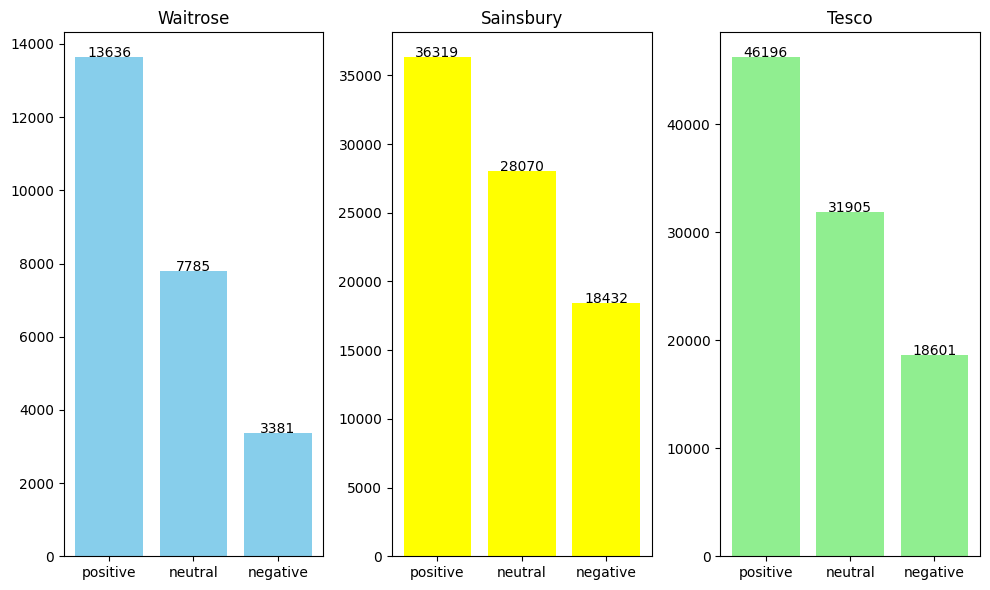

In [38]:
# Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 6))

data1 = waitrose_text['label'].value_counts()
data2 = sainsbury_text['label'].value_counts()
data3 = tesco_text['label'].value_counts()
# Axis 0: waitrose
axes[0].bar(data1.index, data1.values, color='skyblue')
axes[0].set_title('Waitrose')
for i, v in enumerate(data1.values):
    axes[0].text(i, v + 0.5, str(v), color='black', ha='center')

# Axis 1: sainsbury
axes[1].bar(data2.index, data2.values, color='yellow')
axes[1].set_title('Sainsbury')
for i, v in enumerate(data2.values):
    axes[1].text(i, v + 0.5, str(v), color='black', ha='center')

# Axis 2: tesco
axes[2].bar(data3.index, data3.values, color='lightgreen')
axes[2].set_title('Tesco')
for i, v in enumerate(data3.values):
    axes[2].text(i, v + 0.5, str(v), color='black', ha='center')

# Show plot
plt.tight_layout()
plt.show()


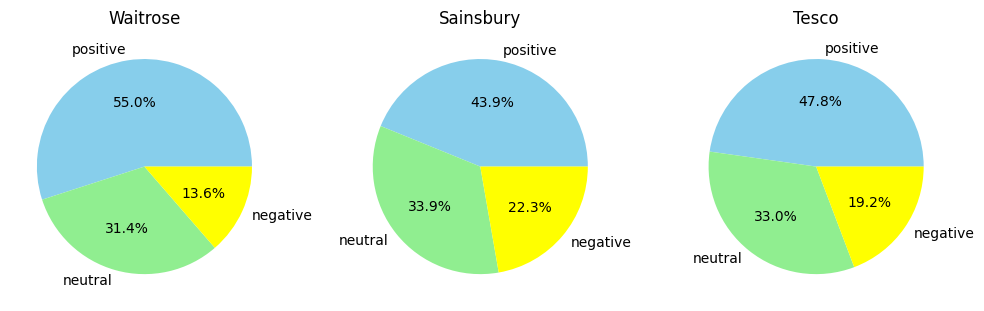

In [39]:
# Visualisation
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 6))

data1 = waitrose_text['label'].value_counts()
data2 = sainsbury_text['label'].value_counts()
data3 = tesco_text['label'].value_counts()
# Axis 0: waitrose
axes[0].pie(data1.values, labels=data1.index, autopct="%.1f%%", colors=['skyblue', 'lightgreen', 'yellow'])
axes[0].set_title('Waitrose')

# Axis 1: sainsbury
axes[1].pie(data2.values, labels=data2.index, autopct="%.1f%%", colors=['skyblue', 'lightgreen', 'yellow'])
axes[1].set_title('Sainsbury')


# Axis 2: tesco
axes[2].pie(data3.values, labels=data3.index, autopct="%.1f%%", colors=['skyblue', 'lightgreen', 'yellow'])
axes[2].set_title('Tesco')

# Show plot
plt.tight_layout()
plt.show()



---



Creat Word cloud for 'Sainsbury'

In [40]:
df = sainsbury_text[['label','text']]
df

,label,text
9738,negative,sainsburys order placed dec delayed amp ...
64647,neutral,saffronwatson sainsburys i could find 😢😢
79476,positive,so pleased sainsburys started stocking burra...
61178,negative,sainsburys it marsh mills plymouth probably ...
15750,positive,loving new label sainsburys taste difference ...
...,...,...
57535,positive,rt poorscousertom dear ocado waitrose sa...
80215,positive,typenamehere drphiliplee sainsburys you ...
13749,neutral,poorscousertom ocado waitrose sainsburys ...
32525,positive,rt poorscousertom dear ocado waitrose sa...


In [41]:
stop_words = stopwords.words('english')
new_stopwords = ['rt','https','co','twitter','tweet','sainsbury','sainsbury s','sainsburys','s']

stop_words.extend(new_stopwords)

In [42]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))

<ipython-input-42-9fadc1034d4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))


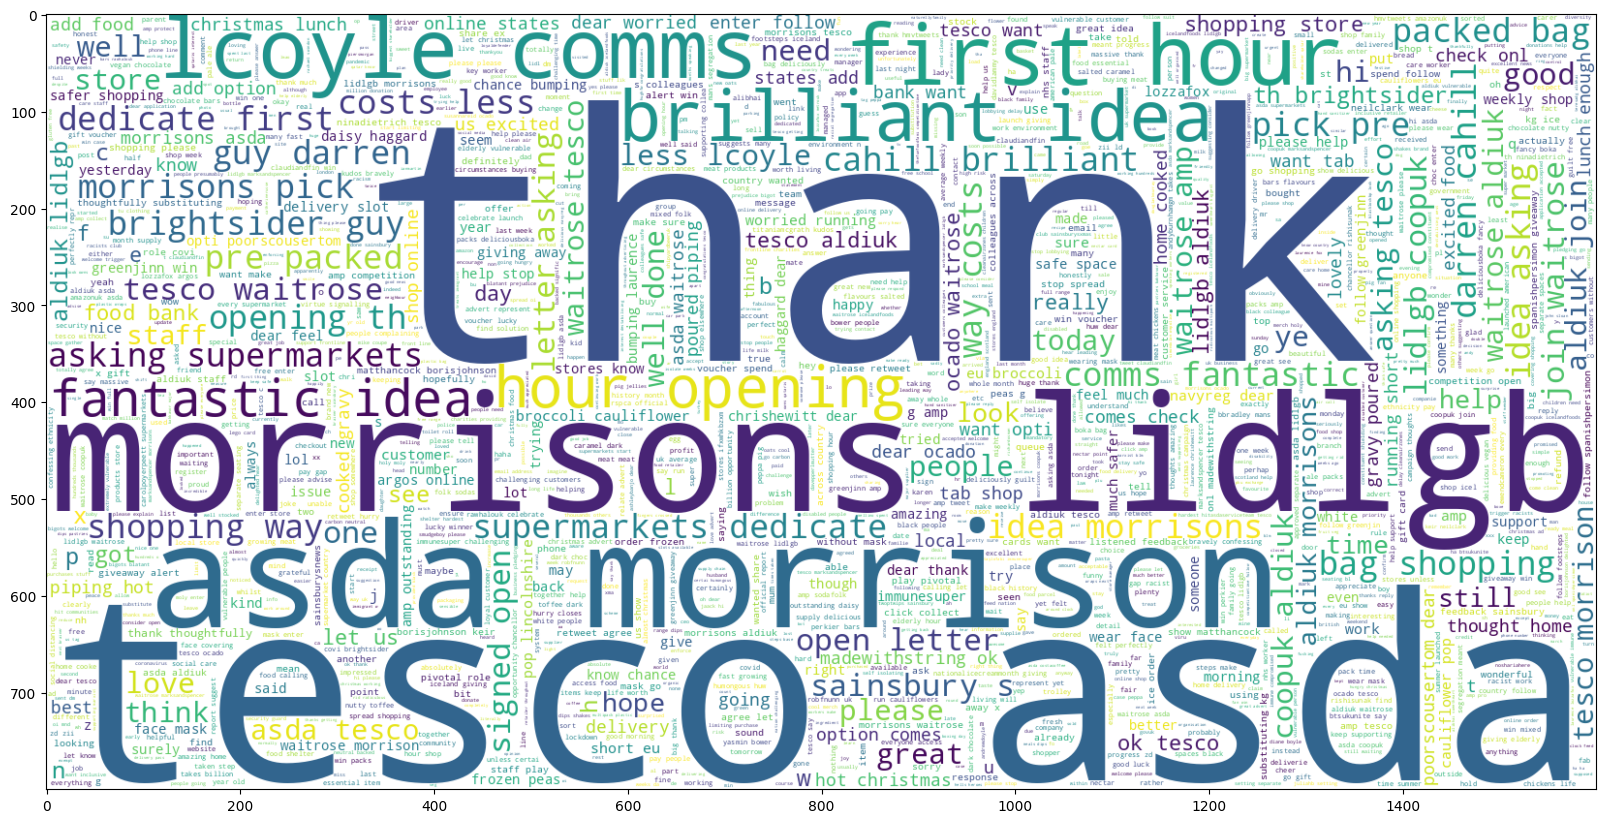

In [43]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

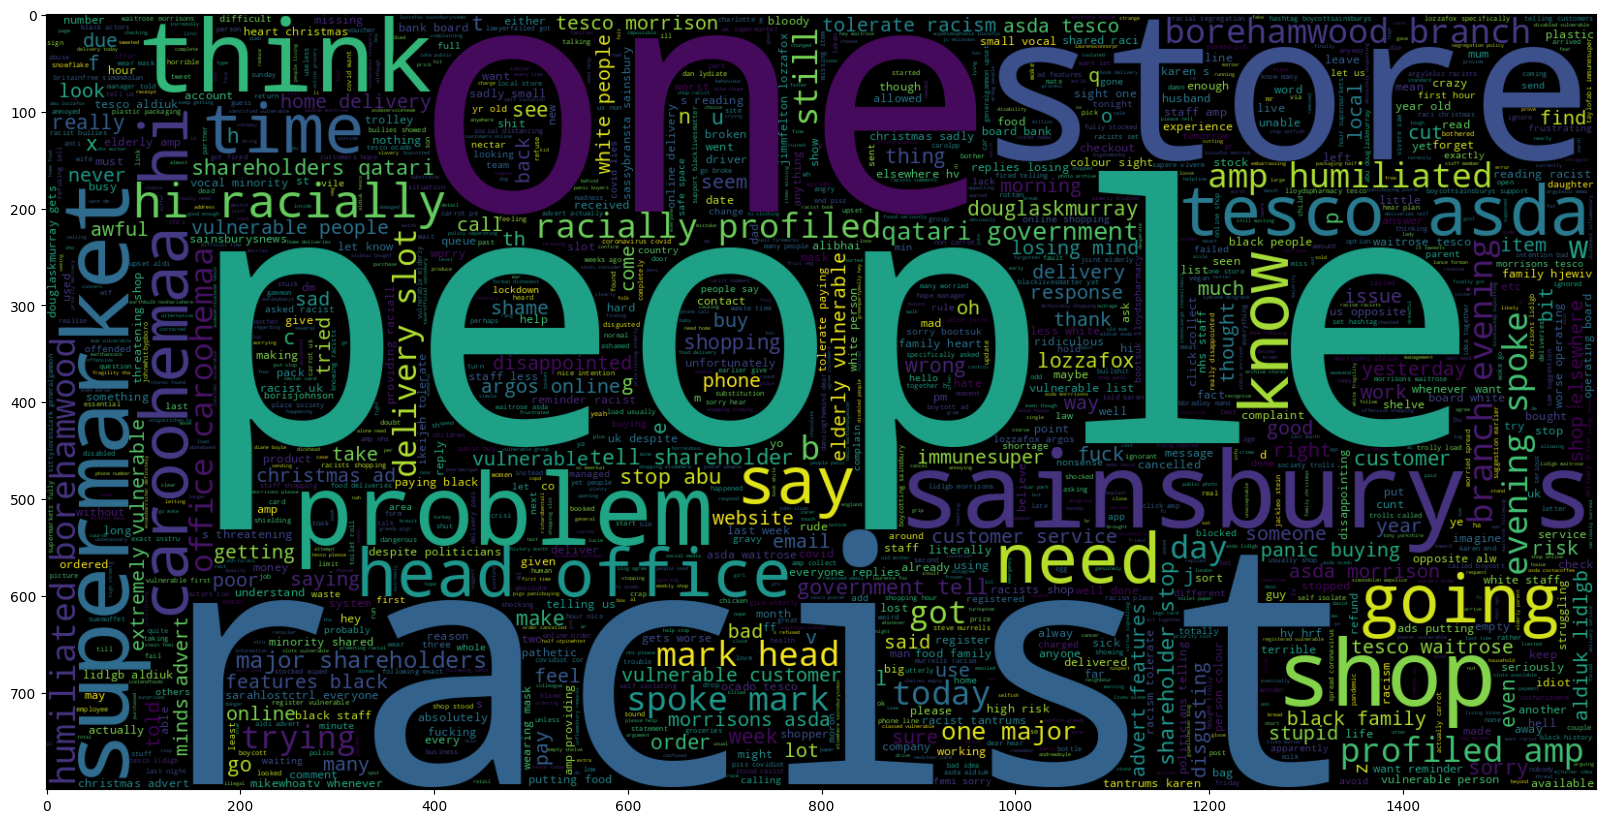

In [44]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')



---



LDA analysis

In [46]:
# Import Gensim
import gensim
import gensim.corpora as corpora
# Import spaCy
import spacy
# Import pyLDAvis for visualisation
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.7 MB/s eta 0:00:00


In [47]:
# Generate tokens
def generate_tokens(text):
   words = []
   for word in text.split(' '):
    if word!='':
       words.append(word)
   return words
df['token'] = df.text.apply(generate_tokens)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-ee1b85168d09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df.text.apply(generate_tokens)


In [48]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,label,text,token
9738,negative,order placed dec delayed amp subsequently “los...,"[order, placed, dec, delayed, amp, subsequentl..."
64647,neutral,saffronwatson could find 😢😢,"[saffronwatson, could, find, 😢😢]"
79476,positive,pleased started stocking burrata king soft mil...,"[pleased, started, stocking, burrata, king, so..."
61178,negative,marsh mills plymouth probably pm sunday gone i...,"[marsh, mills, plymouth, probably, pm, sunday,..."
15750,positive,loving new label taste difference fino bodegas...,"[loving, new, label, taste, difference, fino, ..."


In [49]:
# Create a dictionary for tweets
def create_dictionary(words):
   return corpora.Dictionary(words)
id2word = create_dictionary(df['token'])
print(id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<105207 unique tokens: ['amp', 'ca…', 'cwu', 'dec', 'delayed']...>


In [50]:
# Transfer text to document-term matrix
def create_document_matrix(token,id2word):
    corpus = []
    for text in token:
       corpus.append(id2word.doc2bow(text))
    return corpus
corpus = create_document_matrix(df['token'],id2word)
print(df['token'][0])
print(corpus[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['felixprojectuk', 'today', 'collected', 'food', 'donated', 'shoppers', 'branch', 'alperton', 'touched', 'find…']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=8,
                                            random_state=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Visualisation
pyLDAvis.enable_notebook()
LDA = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.220440  0.237850       1        1  15.835014
0      0.028560  0.339340       2        1  15.035081
5      0.293465 -0.121154       3        1  14.952926
6     -0.295810  0.012144       4        1  13.448481
2      0.344110  0.183615       5        1  12.905873
4      0.007626 -0.032604       6        1  11.965809
7     -0.238539 -0.249445       7        1   9.112601
1      0.081027 -0.369748       8        1   6.744215, topic_info=                  Term          Freq         Total Category  logprob  loglift
254              tesco  13950.000000  13950.000000  Default  30.0000  30.0000
165           waitrose  10591.000000  10591.000000  Default  29.0000  29.0000
2019             ocado   7317.000000   7317.000000  Default  28.0000  28.0000
919               want  11552.000000  11552.000000  Default  27.0000  27.0000
11717           states   5199.000000   5199.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
98967  haynesgreyhound    379.413559    405.776061   Topic8  -5.0102   2.6293
3779            called    512.951466    664.166781   Topic8  -4.7087   2.4381
1262              part    271.179857    286.117051   Topic8  -5.3461   2.6429
3691             month    286.759912    339.988810   Topic8  -5.2902   2.5262
200                  …   1038.642654   4484.442760   Topic8  -4.0032   1.2338

[462 rows x 6 columns], token_table=       Topic      Freq Term
term                       
6176       4  0.999605   ad
552        2  0.991138  add
552        3  0.000165  add
552        6  0.008588  add
8558       1  0.006570  ads
...      ...       ...  ...
88008      4  0.005183    🎄
88008      6  0.000576    🎄
6566       7  0.997651    🎉
1293       1  0.994036    🙄
5068       8  0.998696    🤩

[925 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 7, 3, 5, 8, 2])